In [1]:
from functools import partial
import matplotlib
import matplotlib.pyplot as plt

from job_shop_lib import JobShopInstance, Operation
from job_shop_lib.graphs import build_disjunctive_graph, NodeType
from job_shop_lib.graphs.graph_updaters import DisjunctiveGraphUpdater
from job_shop_lib.dispatching import Dispatcher
from job_shop_lib.dispatching.rules import DispatchingRuleSolver
from job_shop_lib.visualization.gantt import get_partial_gantt_chart_plotter
from job_shop_lib.visualization.graphs import plot_disjunctive_graph


CPU = 0
GPU = 1
DATA_CENTER = 2

job_1 = [Operation(CPU, 1), Operation(GPU, 1), Operation(DATA_CENTER, 7)]
job_2 = [Operation(GPU, 5), Operation(DATA_CENTER, 1), Operation(CPU, 1)]
job_3 = [Operation(DATA_CENTER, 1), Operation(CPU, 3), Operation(GPU, 2)]

jobs = [job_1, job_2, job_3]

instance = JobShopInstance(jobs, name="Example")

In [2]:
cmap_func = matplotlib.colormaps.get_cmap("Dark2_r")
cmap_func(1 / 3)
machine_colors = {}
for i in range(instance.num_machines):
    machine_colors[i] = cmap_func((i + 1) / instance.num_machines)

In [3]:
partial_graph_plotter = partial(
    plot_disjunctive_graph,
    title="",
    machine_labels=["$M_1$", "$M_2$", "$M_3$"],
    edge_width=1.5,
    disjunctive_edges_additional_params={
        "connectionstyle": "arc3,rad=0.",
        "arrowstyle": "-|>",
    },
    machine_colors=machine_colors,
)
partial_gantt_chart_plotter = get_partial_gantt_chart_plotter(
    title="",
    show_available_operations=True,
    job_labels=["$J_1$", "$J_2$", "$J_3$"],
)

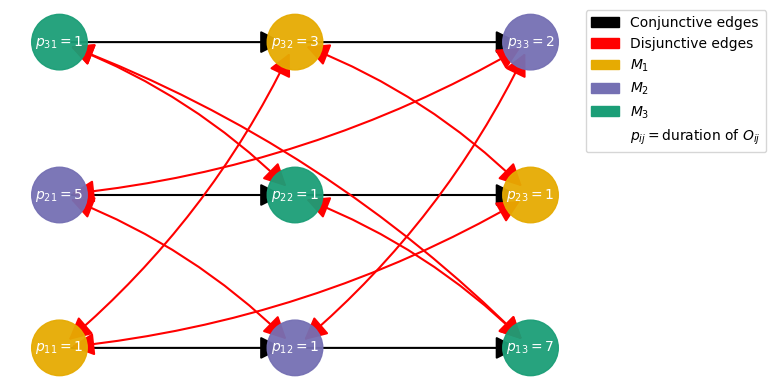

In [4]:
graph = build_disjunctive_graph(instance)
# Remove source and sink nodes
graph.remove_node(graph.nodes_by_type[NodeType.SOURCE][0].node_id)
graph.remove_node(graph.nodes_by_type[NodeType.SINK][0].node_id)
_ = plot_disjunctive_graph(
    graph,
    title="",
    machine_colors=machine_colors,
    edge_width=1.5,
    disjunctive_edges_additional_params={
        "connectionstyle": "arc3,rad=0.11",
        "arrowstyle": "<|-|>",
    },
    machine_labels=["$M_1$", "$M_2$", "$M_3$"],
    draw_disjunctive_edges="single_edge",
)

0


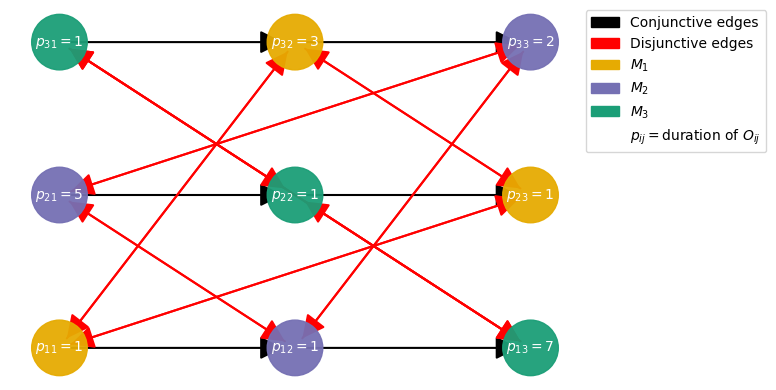

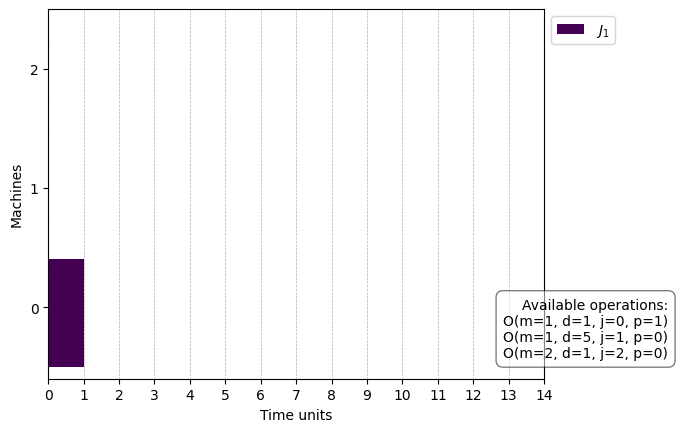

1


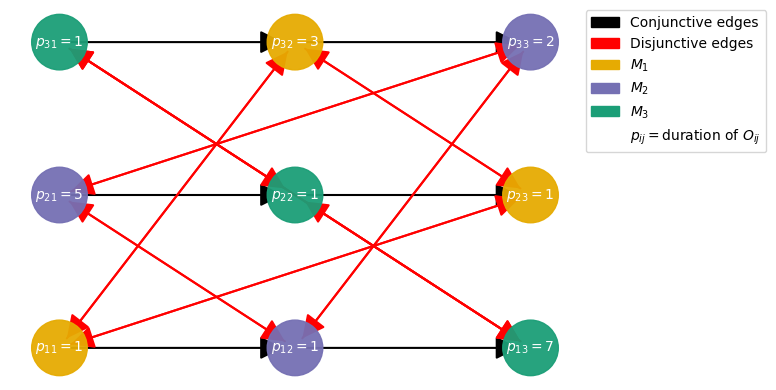

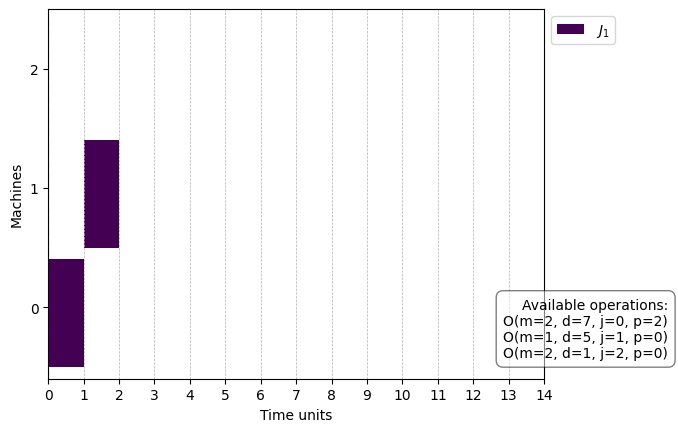

2


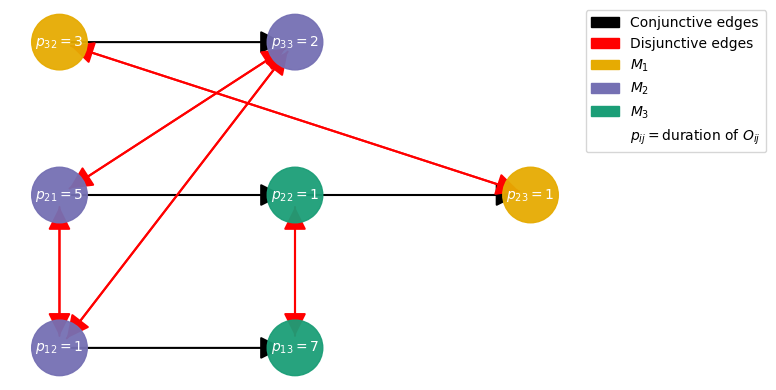

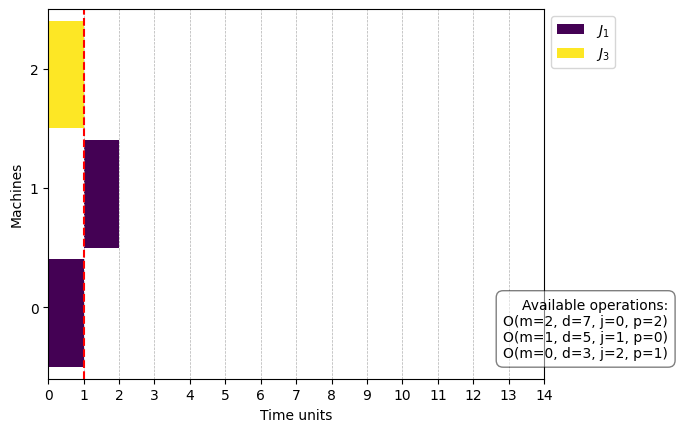

3


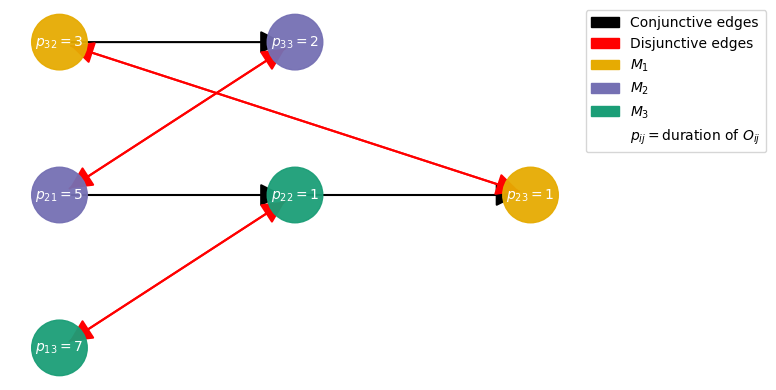

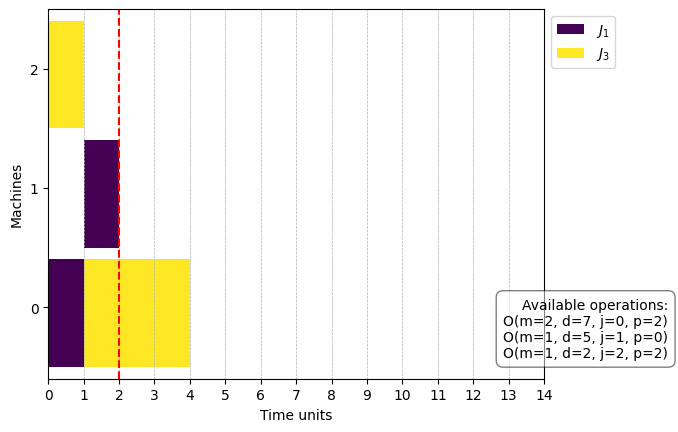

4


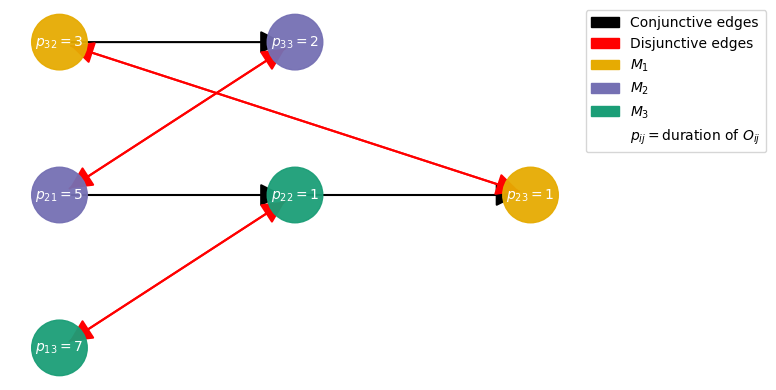

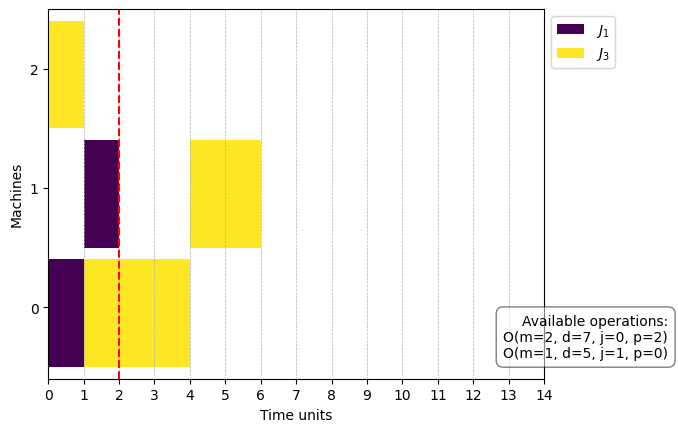

5


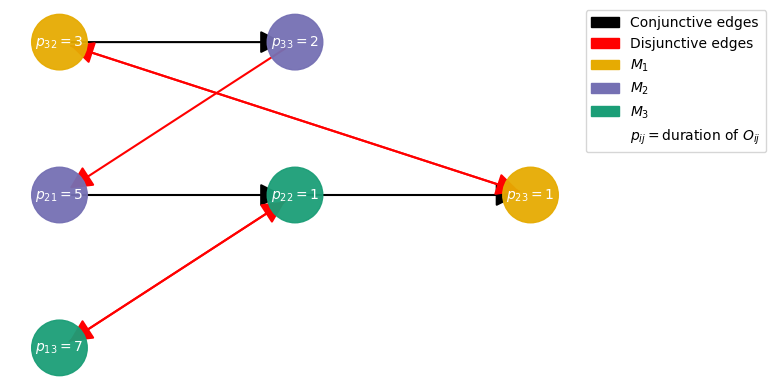

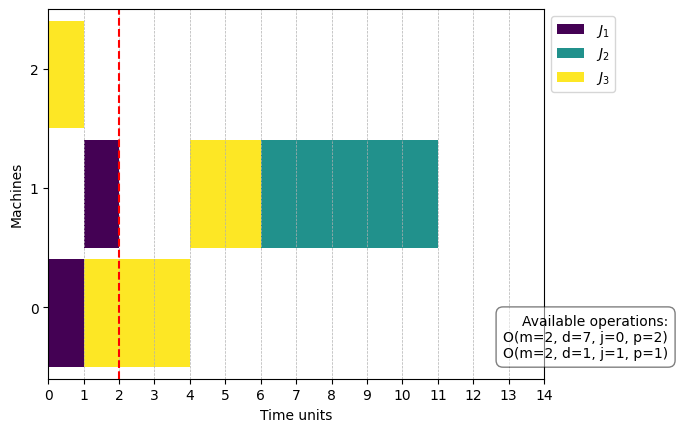

6


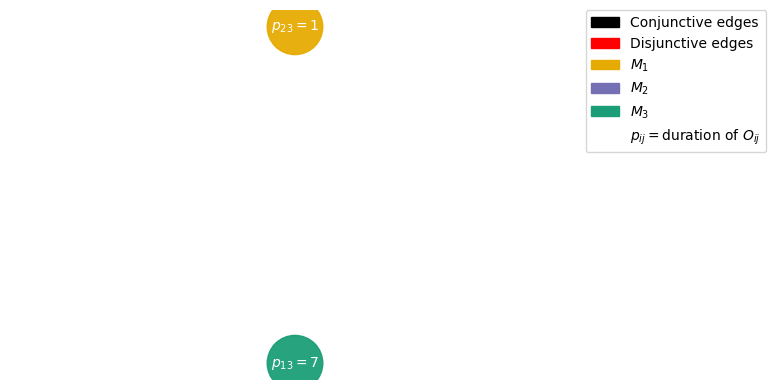

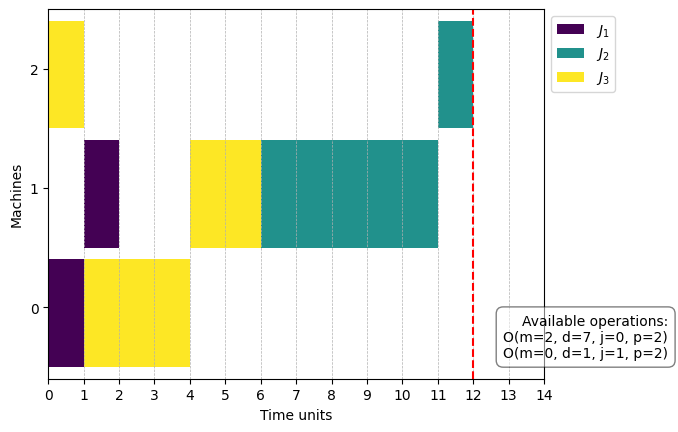

7


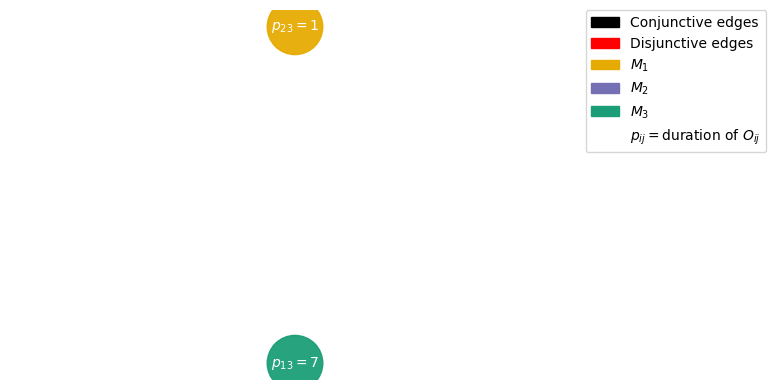

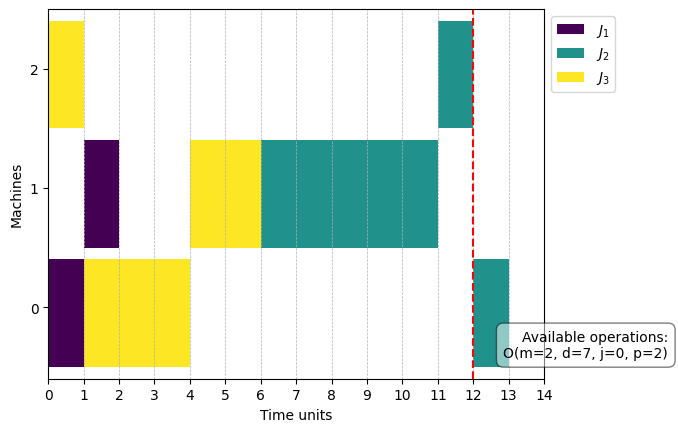

8


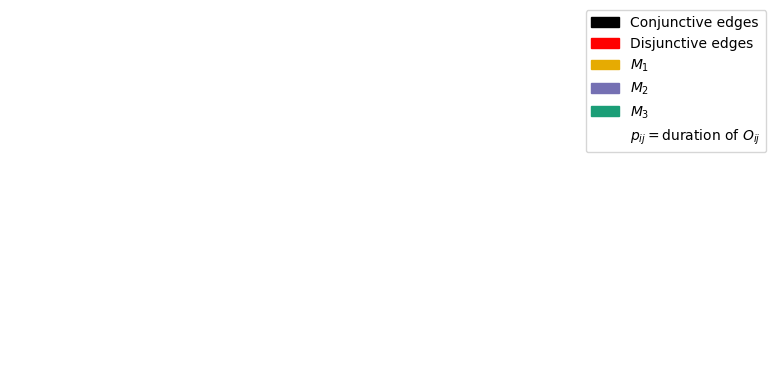

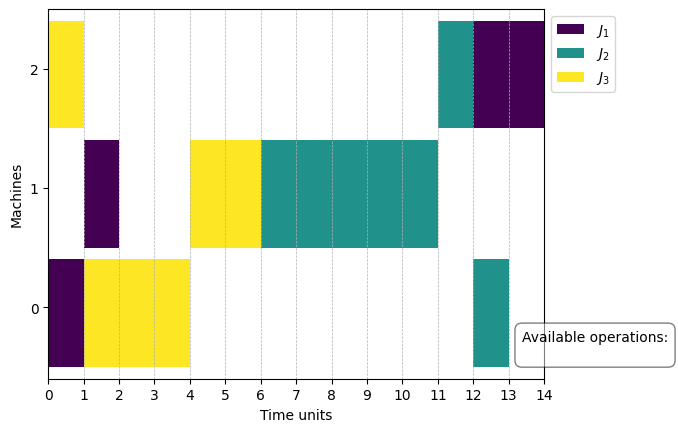

In [5]:
dispatcher = Dispatcher(instance)
graph = build_disjunctive_graph(instance)

# Remove source and sink nodes
graph.remove_node(graph.nodes_by_type[NodeType.SOURCE][0].node_id)
graph.remove_node(graph.nodes_by_type[NodeType.SINK][0].node_id)
updater = DisjunctiveGraphUpdater(dispatcher=dispatcher, job_shop_graph=graph)
dpr_solver = DispatchingRuleSolver(
    "shortest_processing_time", ready_operations_filter=None
)
for _ in range(instance.num_operations):
    print(_)
    dpr_solver.step(dispatcher)
    # plot the graph
    partial_graph_plotter(updater.job_shop_graph)
    plt.show()
    # plot the gantt chart
    partial_gantt_chart_plotter(
        dispatcher.schedule,
        current_time=dispatcher.current_time(),
        makespan=14,
        available_operations=dispatcher.available_operations(),
    )
    plt.show()